# Kaggle's Competition: Roosevelt National Forest Classification Problem

In [1]:
# essentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML algothms 
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# preprocessing
from sklearn.preprocessing import StandardScaler

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# pipeline
from sklearn.pipeline import Pipeline

# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [13]:
dataset = pd.read_csv('train.csv')

In [14]:
dataset.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [28]:
dataset['Cover_Type'].value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

In [5]:
list(enumerate(dataset.columns))

[(0, 'Id'),
 (1, 'Elevation'),
 (2, 'Aspect'),
 (3, 'Slope'),
 (4, 'Horizontal_Distance_To_Hydrology'),
 (5, 'Vertical_Distance_To_Hydrology'),
 (6, 'Horizontal_Distance_To_Roadways'),
 (7, 'Hillshade_9am'),
 (8, 'Hillshade_Noon'),
 (9, 'Hillshade_3pm'),
 (10, 'Horizontal_Distance_To_Fire_Points'),
 (11, 'Wilderness_Area1'),
 (12, 'Wilderness_Area2'),
 (13, 'Wilderness_Area3'),
 (14, 'Wilderness_Area4'),
 (15, 'Soil_Type1'),
 (16, 'Soil_Type2'),
 (17, 'Soil_Type3'),
 (18, 'Soil_Type4'),
 (19, 'Soil_Type5'),
 (20, 'Soil_Type6'),
 (21, 'Soil_Type7'),
 (22, 'Soil_Type8'),
 (23, 'Soil_Type9'),
 (24, 'Soil_Type10'),
 (25, 'Soil_Type11'),
 (26, 'Soil_Type12'),
 (27, 'Soil_Type13'),
 (28, 'Soil_Type14'),
 (29, 'Soil_Type15'),
 (30, 'Soil_Type16'),
 (31, 'Soil_Type17'),
 (32, 'Soil_Type18'),
 (33, 'Soil_Type19'),
 (34, 'Soil_Type20'),
 (35, 'Soil_Type21'),
 (36, 'Soil_Type22'),
 (37, 'Soil_Type23'),
 (38, 'Soil_Type24'),
 (39, 'Soil_Type25'),
 (40, 'Soil_Type26'),
 (41, 'Soil_Type27'),
 (42, '

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

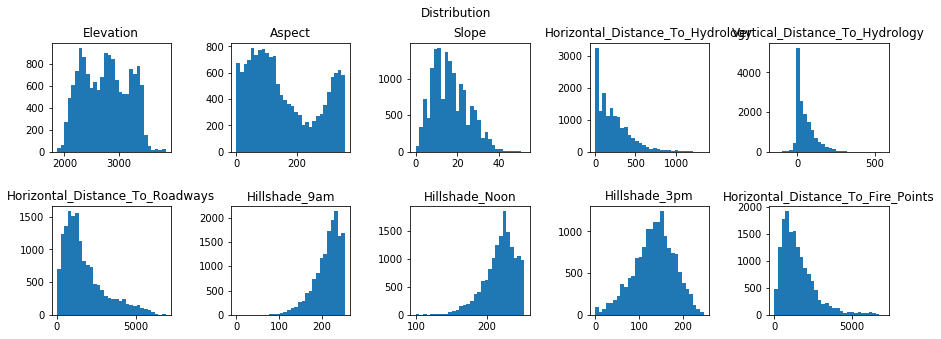

In [12]:
fig, axes = plt.subplots(2, 5, figsize=(15, 5))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

axes = axes.ravel()

for col, ax in zip(dataset.columns[1:11], axes):
    ax.hist(dataset[col], bins=30)
    ax.set_title(col)
fig.suptitle('Distribution');

In [68]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

---

# k-Nearest Neighbors

In [73]:
# pipeline
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [74]:
# cross val score of the model
cross_val_score(pipe_knn, X, y, cv=3, scoring='accuracy')

array([0.52698413, 0.60257937, 0.54484127])

In [27]:
# parameter grid
param_grid_knn = {'knn__n_neighbors' : list(range(2, 16))}

# grid search
gs_knn = GridSearchCV(pipe_knn, param_grid=param_grid_knn, cv=3, scoring='accuracy')
gs_knn.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'knn__n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [28]:
gs_knn.best_score_

0.5731481481481482

In [32]:
gs_knn.best_params_

{'knn__n_neighbors': 14}

In [34]:
pd.DataFrame(gs_knn.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.562480,0.038274,3.505116,0.828380,2,{'knn__n_neighbors': 2},0.486706,0.560317,0.494048,0.513690,0.033106,14,0.923115,0.919444,0.931944,0.924835,0.005246
1,0.499985,0.012756,3.857710,0.860750,3,{'knn__n_neighbors': 3},0.518452,0.597222,0.522817,0.546164,0.036148,13,0.898909,0.889385,0.905060,0.897784,0.006448
2,0.510396,0.007370,4.010962,0.813493,4,{'knn__n_neighbors': 4},0.515873,0.599603,0.525000,0.546825,0.037505,12,0.876786,0.867560,0.887202,0.877183,0.008024
3,0.494784,0.007366,4.203010,0.883952,5,{'knn__n_neighbors': 5},0.526984,0.602579,0.544841,0.558135,0.032261,11,0.858730,0.847619,0.868849,0.858399,0.008670
4,0.494781,0.007367,4.286342,0.837078,6,{'knn__n_neighbors': 6},0.536905,0.604960,0.543254,0.561706,0.030695,10,0.846825,0.836607,0.857738,0.847057,0.008628
5,0.557279,0.060292,4.890462,1.206486,7,{'knn__n_neighbors': 7},0.548810,0.597421,0.554762,0.566997,0.021649,6,0.832738,0.824901,0.844345,0.833995,0.007988
6,0.584649,0.065068,4.756893,0.714747,8,{'knn__n_neighbors': 8},0.546825,0.597619,0.542659,0.562368,0.024984,9,0.827579,0.820337,0.841964,0.829960,0.008988
7,0.515612,0.000001,5.041535,1.145212,9,{'knn__n_neighbors': 9},0.554167,0.596627,0.544643,0.565146,0.022598,8,0.815278,0.811706,0.828075,0.818353,0.007028
8,0.562488,0.033751,5.175589,1.125787,10,{'knn__n_neighbors': 10},0.556349,0.597024,0.542857,0.565410,0.023023,7,0.807937,0.808730,0.824107,0.813591,0.007443
9,0.531234,0.022097,5.296736,0.973000,11,{'knn__n_neighbors': 11},0.560714,0.599206,0.547421,0.569114,0.021960,5,0.802282,0.799206,0.816766,0.806085,0.007656


---

## GaussianNB

In [35]:
# instantiate the model
gauss_nb = GaussianNB()

In [36]:
# cross val
cross_val_score(gauss_nb, X, y, cv=3, scoring='accuracy')

array([0.5702381 , 0.5906746 , 0.51547619])

---

## SGD Classifier

In [69]:
# instantiate the model
sgd_clf = SGDClassifier()

In [70]:
cross_val_score(sgd_clf, X, y, cv=3, scoring='accuracy')

array([0.32480159, 0.21369048, 0.22003968])

In [75]:
pipe_sgd = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd_clf', SGDClassifier())
])

In [76]:
cross_val_score(pipe_sgd, X, y, cv=3, scoring='accuracy')

array([0.52539683, 0.52103175, 0.44464286])

---

## Linear SVC

In [71]:
lin_svc = LinearSVC()

In [72]:
cross_val_score(lin_svc, X, y, cv=3, scoring='accuracy')

array([0.33888889, 0.3297619 , 0.22222222])

## Logistic Regression

In [16]:
cross_val_score(LogisticRegression(), X, y, cv=3, scoring='accuracy')

array([0.55456349, 0.59722222, 0.4656746 ])

In [17]:
param_grid = {'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=3, scoring='accuracy')

In [18]:
cross_val_score(grid_search, X, y, scoring='accuracy')

array([0.54543651, 0.59662698, 0.52876984])

In [19]:
grid_search.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [22]:
grid_search.best_estimator_

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
cross_val_score(LogisticRegression(C=0.1), X, y, cv=3)

array([0.55119048, 0.60753968, 0.5       ])

In [24]:
cross_val_score(LogisticRegression(C=0.1, penalty='l1'), X, y, cv=3)

array([0.54761905, 0.61170635, 0.48650794])

## Random Forest Classifier

In [26]:
random_forest = RandomForestClassifier()

In [27]:
cross_val_score(random_forest, X, y, cv=3, scoring='accuracy')

array([0.46607143, 0.64265873, 0.52480159])

In [30]:
cross_val_score(RandomForestClassifier(n_estimators=50), X, y, scoring='accuracy')

array([0.44206349, 0.68551587, 0.5827381 ])

In [34]:
cross_val_score(GradientBoostingClassifier(), X, y, cv=3, scoring='accuracy')

array([0.37103175, 0.61329365, 0.38035714])

In [36]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42)

In [37]:
random_forest = RandomForestClassifier().fit(X_train, y_train)

In [38]:
random_forest.score(X_valid, y_valid)

0.8396825396825397

In [40]:
gradient_boosting = GradientBoostingClassifier().fit(X_train, y_train)

In [41]:
gradient_boosting.score(X_valid, y_valid)

0.8174603174603174

In [42]:
logreg = LogisticRegression().fit(X_train, y_train)
print("Logistic Regression accuracy score: {}".format(logreg.score(X_valid, y_valid)))

Logistic Regression accuracy score: 0.6587301587301587
